<a href="https://colab.research.google.com/github/ChintzRuparel/Machine-Learning/blob/main/ML_EXP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [90]:
df = pd.read_csv("diabetes.csv")

In [91]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Text(0.5, 1.0, 'Correlation')

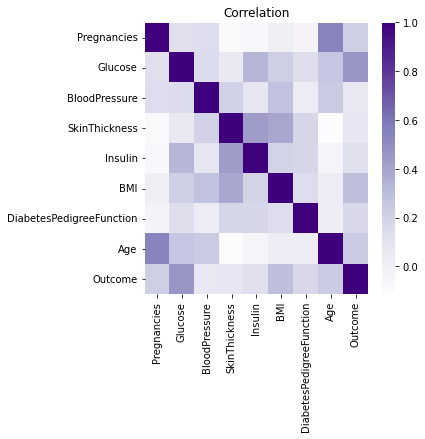

In [92]:
plt.figure(figsize=(5,5))
heatmap = sns.heatmap(df.corr(), cmap="Purples")
heatmap.set_title("Correlation")

In [95]:
Y = df["Outcome"].values
X = df.drop(["Outcome"], axis = 1)

In [96]:

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.25, random_state=0)

In [97]:
models = [SVC(C= .1, kernel='linear', gamma= 1), SVC(kernel='rbf'), SVC(kernel='poly'), SVC(kernel='sigmoid')]

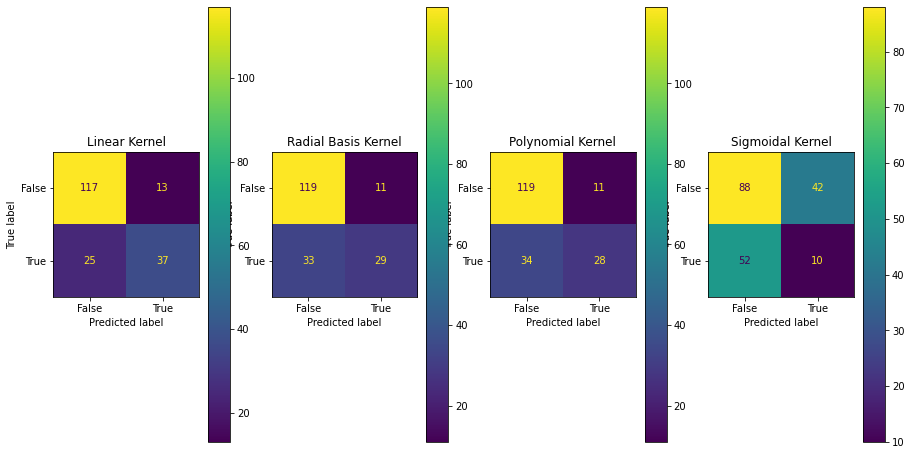

In [98]:
train_outputs = []
test_outputs = []

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 8))
ax[0].set_title("Linear Kernel")
ax[1].set_title("Radial Basis Kernel")
ax[2].set_title("Polynomial Kernel")
ax[3].set_title("Sigmoidal Kernel")

for i, model in enumerate(models):
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot(ax=ax[i])

    train_outputs.append(model.score(x_train, y_train))
    test_outputs.append(model.score(x_test, y_test))

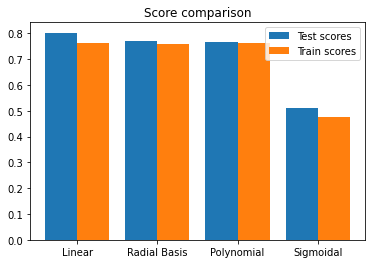

In [100]:

modelNames = [
    "Linear",
    "Radial Basis",
    "Polynomial",
    "Sigmoidal"
]
plt.title("Score comparison")

X_axis = np.arange(len(modelNames))
  
plt.bar(X_axis - 0.2, test_outputs, 0.4, label = 'Test scores')
plt.bar(X_axis + 0.2, train_outputs, 0.4, label = 'Train scores')

plt.xticks(X_axis, modelNames)
plt.legend()
plt.show()
